In [5]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from astropy.table import Table as tb
import numpy as np
%matplotlib inline
gaiarv_cat = tb.read('result.fits', format='fits')

In [6]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import astropy.coordinates as coord
import astropy.units as u

Ra = gaiarv_cat['ra']
Dec = gaiarv_cat['dec']
parallax = gaiarv_cat['parallax']
pmRa = gaiarv_cat['pmra']
pmDec = gaiarv_cat['pmdec']
radialVelocity = gaiarv_cat['dr2_radial_velocity']


print(len(Ra), len(Dec), len(parallax), len(pmRa), len(pmDec), len(radialVelocity))            

c1 = coord.SkyCoord(ra=Ra*u.degree, dec=Dec*u.degree,
                    distance=(parallax*u.mas).to(u.pc, u.parallax()),
                    pm_ra_cosdec=pmRa*u.mas/u.yr,
                    pm_dec=pmDec*u.mas/u.yr,
                    radial_velocity=radialVelocity*u.km/u.s,
                    frame='icrs')

gc1 = c1.transform_to(coord.Galactocentric)

goodData = (np.invert(np.isnan(gc1.x))) & (np.invert(np.isnan(gc1.y))) & (np.invert(np.isnan(gc1.z))) & (np.invert(np.isnan(gc1.v_x)))\
           & (np.invert(np.isnan(gc1.v_y))) & (np.invert(np.isnan(gc1.v_z)))
  

print(gc1.v_x[goodData], gc1.v_y[goodData], gc1.v_z[goodData], gc1.x[goodData], gc1.y[goodData], gc1.z[goodData])

2000 2000 2000 2000 2000 2000
[-261.83331579   70.24806997  145.70304771   81.39478689   59.24664172
   -8.46519684   77.78597271   81.99881653  110.08283213   99.58452291
  -47.69367535  -67.92892384   93.29162299   93.95734333   96.75333303
  120.69631737   78.09761066   82.84673807  114.02258472] km / s [-442.52759576  -77.70858817   -5.57803586  -62.49799366  -44.8247321
 -155.56839605  -14.73437213  -34.61501773  -36.93864064  -36.53894992
  243.77835234  215.85669081  -46.38358604    7.19157539  -58.60084067
  -43.16544149  -52.25483222   -6.95594995  -17.33496704] km / s [-463.58037955 -145.65592554   -5.79094644  -68.18763951 -110.80010644
 -294.03926628  -60.95327552 -116.45414658 -110.3227336   -56.20404057
    6.4646595   -40.02995132 -112.69575436  -21.86162243  -62.01207042
  -82.15863005 -101.48075899  -45.65973221 -118.44372806] km / s [ 7022.68964901 -4535.47571683 -6725.40899607 -4512.94232726
 -4562.79723996  -312.04459037 -4741.06093711 -4548.02210188
 -4974.89156136

C:\ProgramData\Anaconda3\lib\site-packages\astropy\units\equivalencies.py:91: RuntimeWarning: invalid value encountered in less
  d[d < 0] = np.nan


In [7]:
print(np.any(np.isnan(gc1.v_x[goodData])))
print(np.sum(np.isnan(gc1.v_x[goodData])))
print(np.sum(goodData)) 

False
0
19


In [8]:
GoodRa = Ra[goodData]
GoodDec = Dec[goodData]
c = parallax[goodData]
Goodpmra = pmRa[goodData]
Goodpmdec = pmDec[goodData]
GoodradialVelocity = radialVelocity[goodData]

GoodX = gc1.x[goodData]
GoodY = gc1.y[goodData]
GoodZ = gc1.z[goodData]
Good_V_x = gc1.v_x[goodData]
Good_V_y = gc1.v_y[goodData]
Good_V_z = gc1.v_z[goodData]

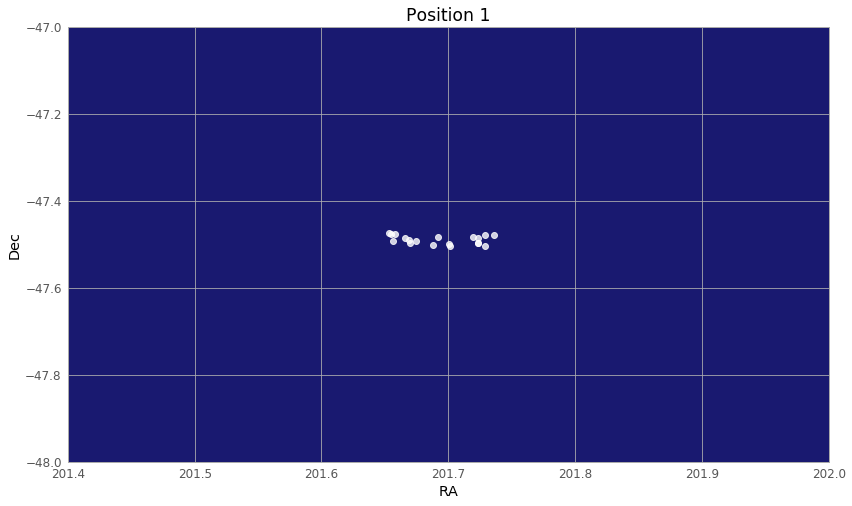

In [9]:
fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,1)
plt.title('Position 1')
#ax.plot(GoodRa,GoodDec,'w,',alpha=0.1)
ax.plot(GoodRa,GoodDec,'wo',alpha=0.8)
ax.set_xlim(190,210)
ax.set_ylim(-53,-42)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_facecolor('midnightblue')
ax.set_xlim(201.4,202.0)
ax.set_ylim(-48,-47)

plt.show()

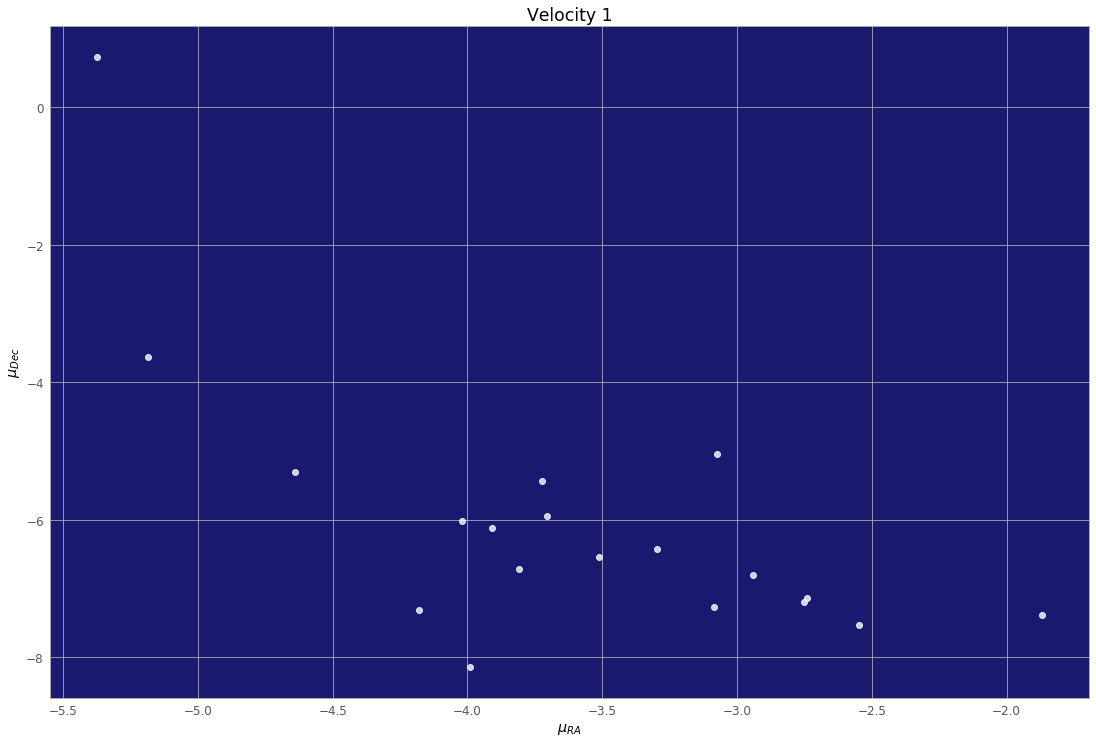

In [10]:
fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,1)
plt.title('Velocity 1')
ax.plot(Goodpmra,Goodpmdec,'wo',alpha=0.8)
ax.set_xlabel('$\mu_{RA}$')
ax.set_ylabel('$\mu_{Dec}$')
ax.set_facecolor('midnightblue')

pyplot.tight_layout()

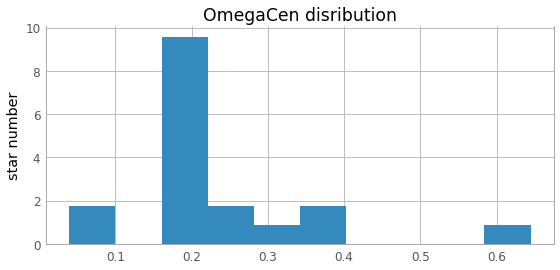

In [11]:
#c = parallax[goodData]

fig = pyplot.figure(figsize=(20,10))
ax = pyplot.subplot(2,2,1)
pyplot.hist(c,alpha=1,density=1)
pyplot.title('OmegaCen disribution')
pyplot.ylabel('star number')
ax = plt.gca()
ax.spines['top'].set_color('none')

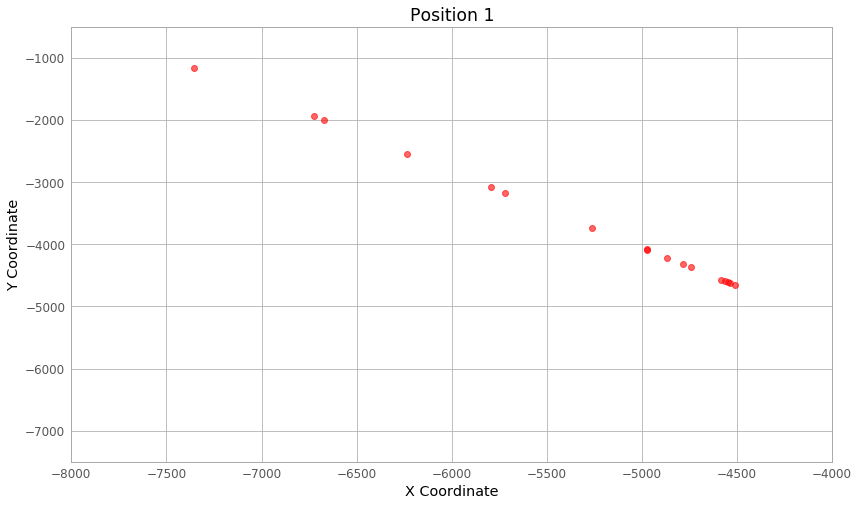

In [12]:
#Position Check
fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,1)
plt.title('Position 1')
ax.plot(GoodX,GoodY,'ro',alpha=0.6)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_xlim(-8000,-4000)
ax.set_ylim(-7500,-500)
plt.show()

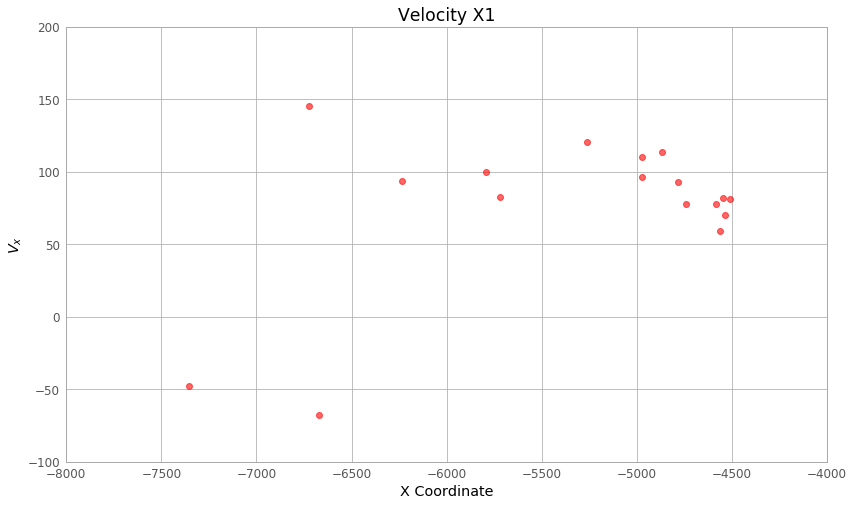

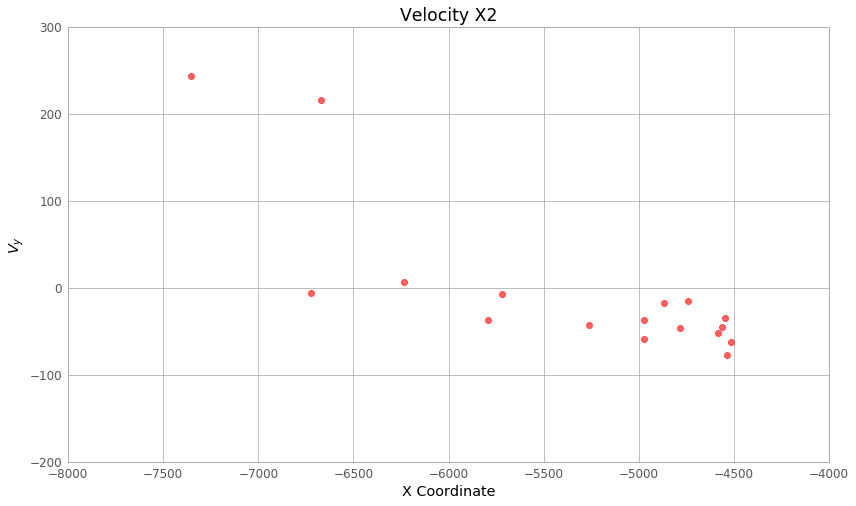

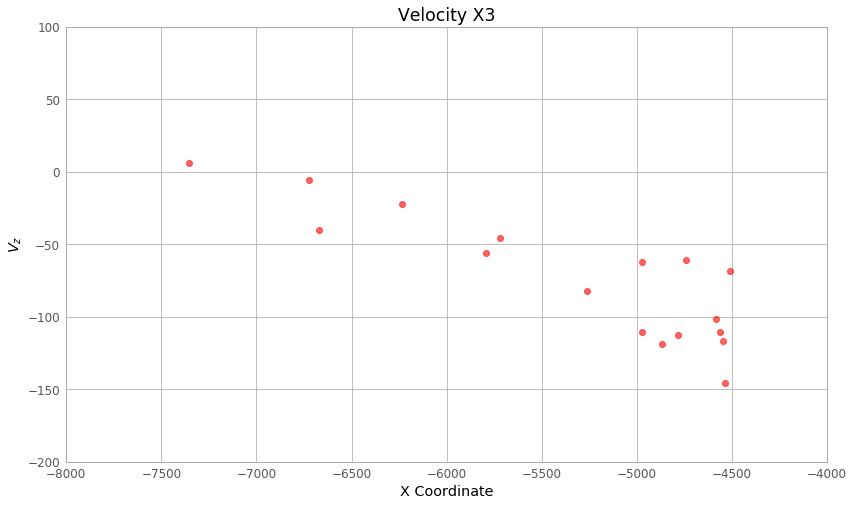

In [13]:
# X vs. Vx,Vy,Vz
fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,1)
plt.title('Velocity X1')
ax.plot(GoodX,Good_V_x,'ro',alpha=0.6)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('$V_{x}$')
ax.set_xlim(-8000,-4000)
ax.set_ylim(-100,200)


fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,2)
plt.title('Velocity X2')
ax.plot(GoodX,Good_V_y,'ro',alpha=0.6)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('$V_{y}$')
ax.set_xlim(-8000,-4000)
ax.set_ylim(-200,300)


fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,3)
plt.title('Velocity X3')
ax.plot(GoodX,Good_V_z,'ro',alpha=0.6)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('$V_{z}$')
ax.set_xlim(-8000,-4000)
ax.set_ylim(-200,100)

plt.show()

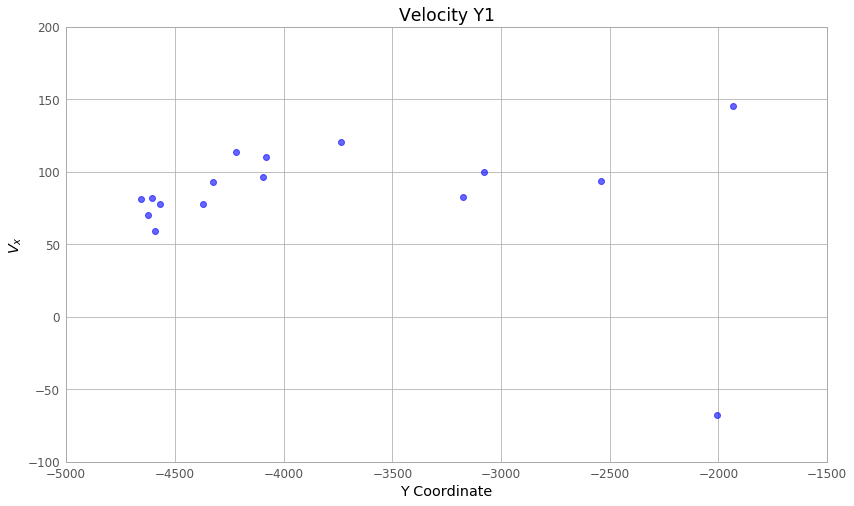

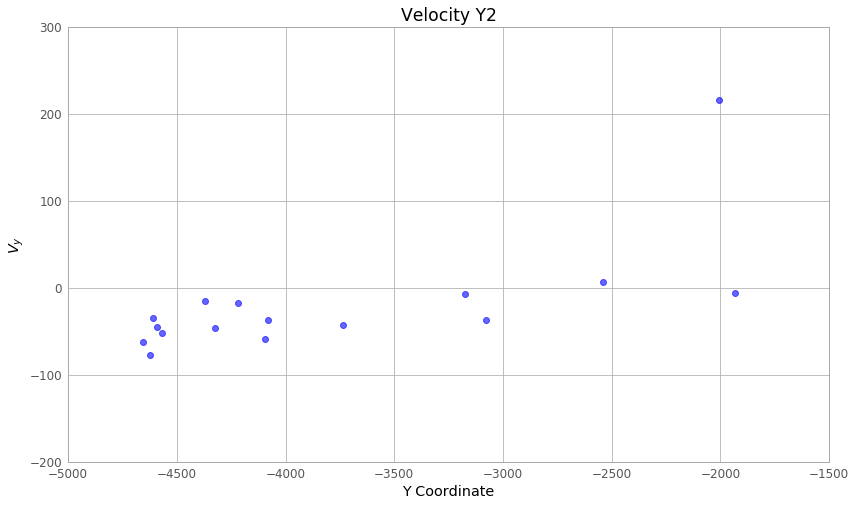

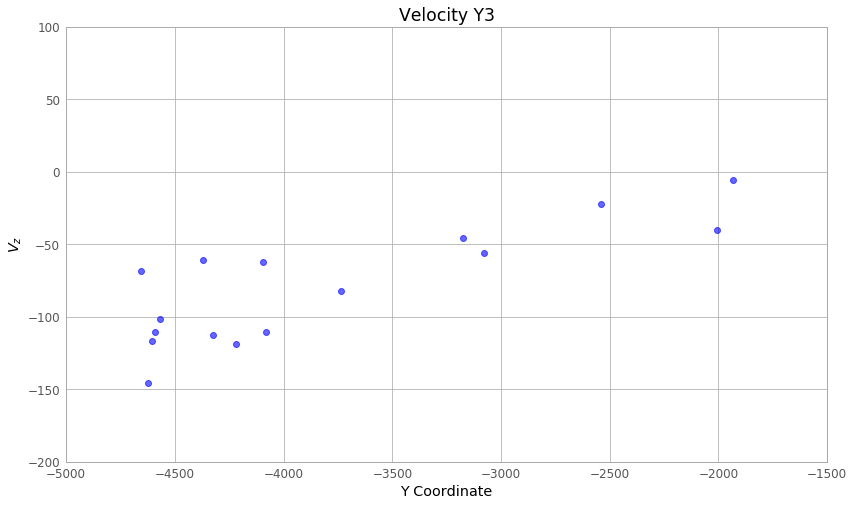

In [14]:
# Y vs. Vx,Vy,Vz
fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,1)
plt.title('Velocity Y1')
ax.plot(GoodY,Good_V_x,'bo',alpha=0.6)
ax.set_xlabel('Y Coordinate')
ax.set_ylabel('$V_{x}$')
ax.set_xlim(-5000,-1500)
ax.set_ylim(-100,200)


fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,2)
plt.title('Velocity Y2')
ax.plot(GoodY,Good_V_y,'bo',alpha=0.6)
ax.set_xlabel('Y Coordinate')
ax.set_ylabel('$V_{y}$')
ax.set_xlim(-5000,-1500)
ax.set_ylim(-200,300)


fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,3)
plt.title('Velocity Y3')
ax.plot(GoodY,Good_V_z,'bo',alpha=0.6)
ax.set_xlabel('Y Coordinate')
ax.set_ylabel('$V_{z}$')
ax.set_xlim(-5000,-1500)
ax.set_ylim(-200,100)

plt.show()

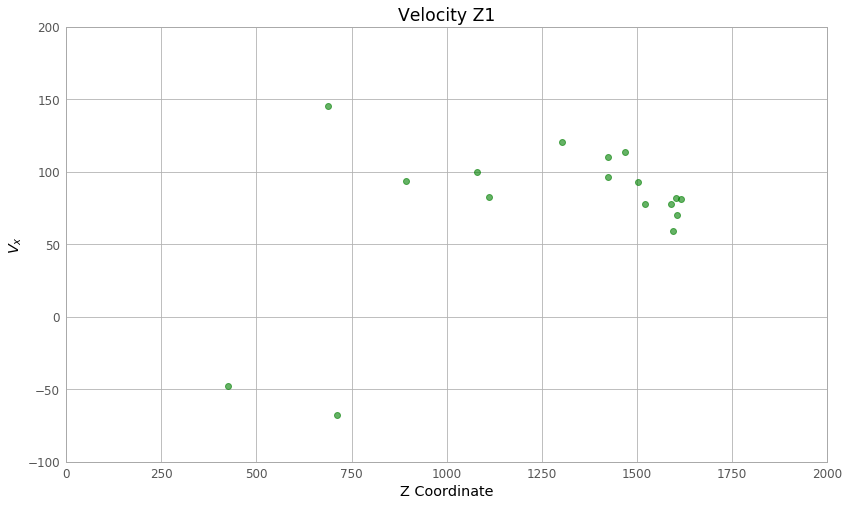

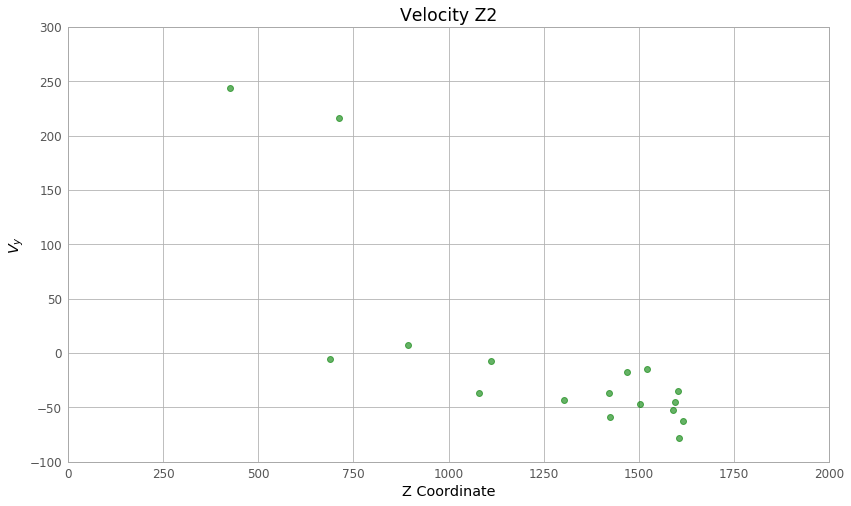

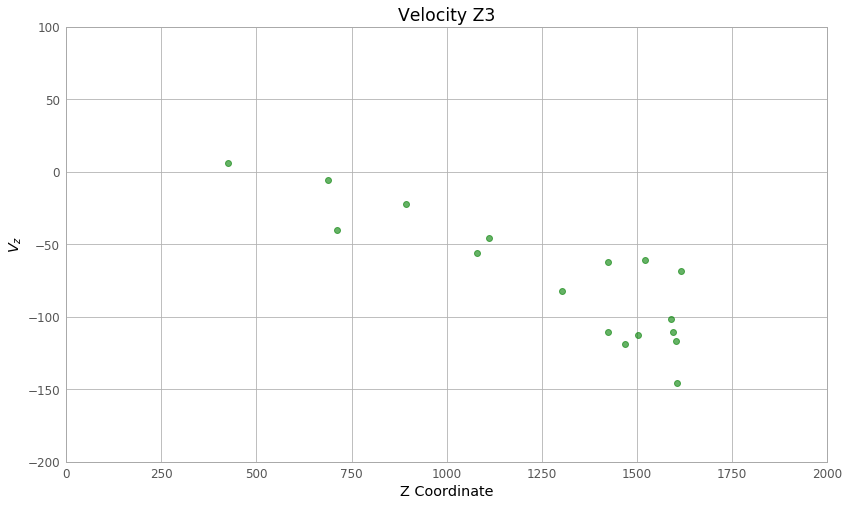

In [15]:
# Z vs. Vx,Vy,Vz
fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,1)
plt.title('Velocity Z1')
ax.plot(GoodZ,Good_V_x,'go',alpha=0.6)
ax.set_xlabel('Z Coordinate')
ax.set_ylabel('$V_{x}$')
ax.set_xlim(0,2000)
ax.set_ylim(-100,200)

fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,2)
plt.title('Velocity Z2')
ax.plot(GoodZ,Good_V_y,'go',alpha=0.6)
ax.set_xlabel('Z Coordinate')
ax.set_ylabel('$V_{y}$')
ax.set_xlim(0,2000)
ax.set_ylim(-100,300)

fig = plt.figure(figsize=(30,20))
ax = plt.subplot(2,2,3)
plt.title('Velocity Z3')
ax.plot(GoodZ,Good_V_z,'go',alpha=0.6)
ax.set_xlabel('Z Coordinate')
ax.set_ylabel('$V_{z}$')
ax.set_xlim(0,2000)
ax.set_ylim(-200,100)

plt.show()

In [16]:
Average_X = np.mean(GoodX)
Average_Y = np.mean(GoodY)
Average_Z = np.mean(GoodZ) 

Average_V_x = np.mean(Good_V_x)
Average_V_y = np.mean(Good_V_y)
Average_V_z = np.mean(Good_V_z) 

print("X coordinate=",Average_X)
print("Y coordinate=",Average_Y)
print("Z coordinate=",Average_Z)

print("Average_V_x=",Average_V_x)
print("Average_V_y=",Average_V_y)
print("Average_V_z=",Average_V_z)

X coordinate= -4428.031263023024 pc
Y coordinate= -4757.442118924843 pc
Z coordinate= 1651.916870941547 pc
Average_V_x= 53.673112048707075 km / s
Average_V_y= -35.23164846881906 km / s
Average_V_z= -105.7824235976792 km / s


Combined_coord [136.94840076  13.35117712  61.36750559  11.7479372   14.8637248
  82.12855897  22.69317645  14.08283117  29.97494488  47.3097443
  69.23830565  60.60248751  24.11420184  54.3986497   29.77831197
  36.94084106  15.93048181  45.98241478  26.83279875] pc(1/2)


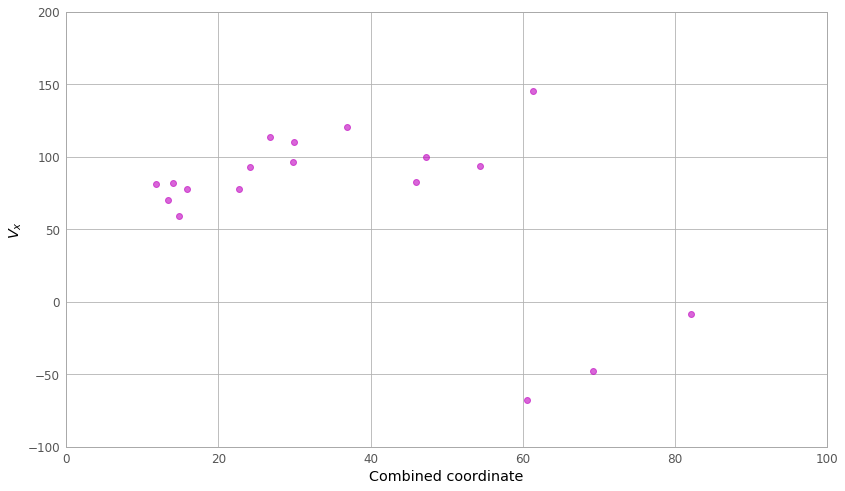

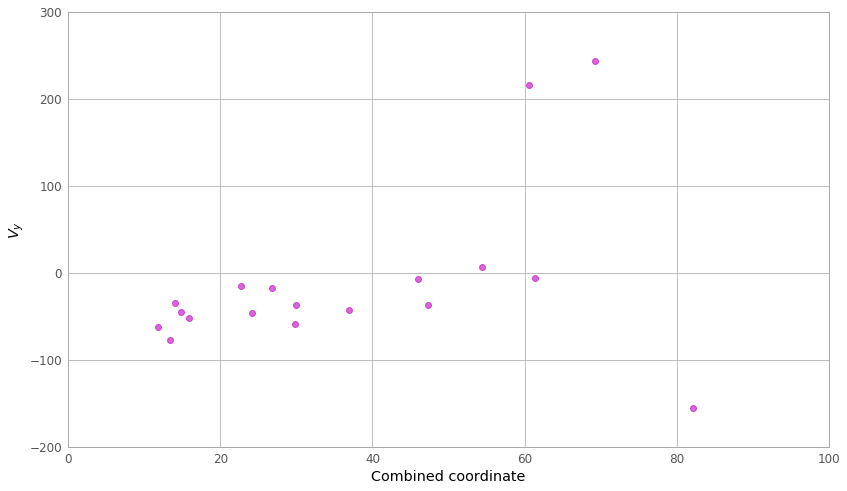

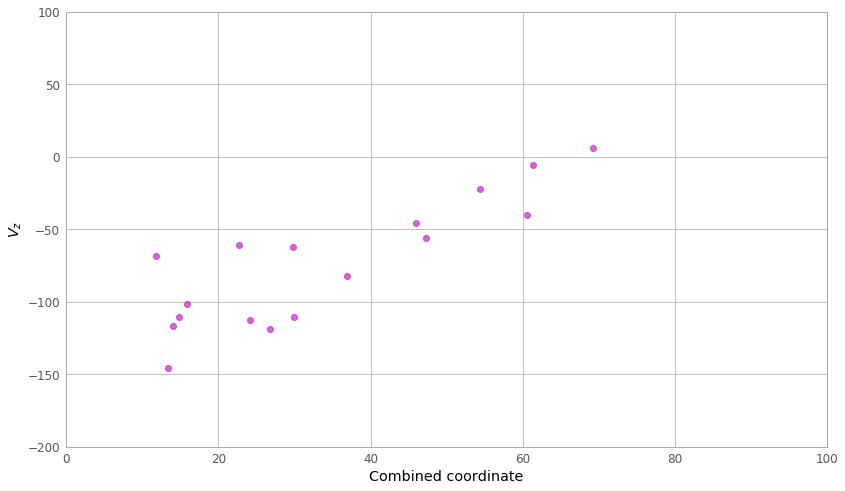

In [17]:
new_X = GoodX - Average_X
new_Y = GoodY - Average_Y
new_Z = GoodZ - Average_Z

Combined_coord = np.sqrt(np.sqrt(np.square(new_X) + np.square(new_Y) + np.square(new_Z)))
print("Combined_coord",Combined_coord)

fig = pyplot.figure(figsize=(30,20))
ax = pyplot.subplot(2,2,1)
ax.plot(Combined_coord,Good_V_x,'mo',alpha=0.6)
ax.set_xlabel('Combined coordinate')
ax.set_ylabel('$V_{x}$')
ax.set_xlim(0,100)
ax.set_ylim(-100,200)

fig = pyplot.figure(figsize=(30,20))
ax = pyplot.subplot(2,2,2)
ax.plot(Combined_coord,Good_V_y,'mo',alpha=0.6)
ax.set_xlabel('Combined coordinate')
ax.set_ylabel('$V_{y}$')
ax.set_xlim(0,100)
ax.set_ylim(-200,300)

fig = pyplot.figure(figsize=(30,20))
ax = pyplot.subplot(2,2,3)
ax.plot(Combined_coord,Good_V_z,'mo',alpha=0.6)
ax.set_xlabel('Combined coordinate')
ax.set_ylabel('$V_{z}$')
ax.set_xlim(0,100)
ax.set_ylim(-200,100)

plt.show()

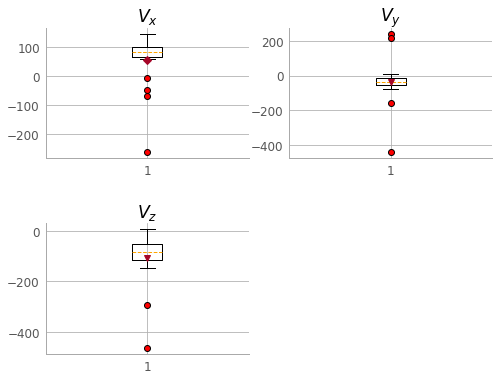

In [26]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

#the distribution of motions at each distance from the cluster center
plt.subplot(2,2,1)
pyplot.title('$V_{x}$')
plt.boxplot(Good_V_x,
            boxprops = {'color':'black'}, 
            showmeans=True,
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D'},
            medianprops = {'linestyle':'--','color':'orange'}) 

#plt.ylim(-100,100)  
ax = plt.gca()
ax.spines['top'].set_color('none')
plt.tick_params(top='off', right='off')
ax.spines['right'].set_color('none')

plt.subplot(2,2,2)
pyplot.title('$V_{y}$')
plt.boxplot(Good_V_y, 
            boxprops = {'color':'black'}, 
            showmeans=True,
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'v'},
            medianprops = {'linestyle':'--','color':'orange'}) 
#plt.ylim(-180,180)
plt.tick_params(top='off', right='off')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.subplot(2,2,3)
pyplot.title('$V_{z}$')
plt.boxplot(Good_V_z, 
            boxprops = {'color':'black'}, 
            showmeans=True,
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'v'},
            medianprops = {'linestyle':'--','color':'orange'}) 
#plt.ylim(-180,180)
plt.tick_params(top='off', right='off')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show()

In [23]:
#the distribution of motions at each distance from the cluster center
import matplotlib.pyplot as plt
from matplotlib import pyplot

R1_ , = np.where(Combined_coord > 0 ) & (Combined_coord < 20 )



UnitConversionError: Can only apply 'less' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [ ]:
plt.subplot(1,2,1)
pyplot.title('$\mu_{RA}$')
plt.boxplot(Goodpmra,
            boxprops = {'color':'black'}, 
            showmeans=True,
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D'},
            medianprops = {'linestyle':'--','color':'orange'}) 